# Linear Regression

Step 1, import requirements

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

the ones that not needed always, plotting style

In [6]:
import matplotlib
matplotlib.style.use('ggplot')  # Use ggplot style for better aesthetics

Example set to build model 

$\hat{y} = w_0 + w_1x$

In [7]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot this to see if the linear model makes sense

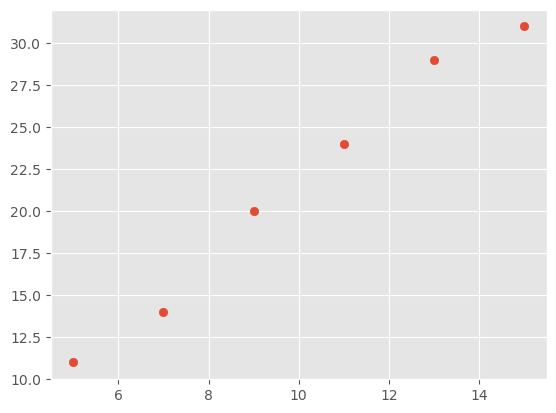

In [8]:
plt.scatter(X, y)
plt.show()

In [9]:
# Correlation coefficient

np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

considering 1 is perfect corelation, 0.9932 is very high corelation!!

## Data Structure


Let's look at X and y in more details

In [ ]:
# checking the shape of y - it's 1 dimensional with 6 elements

y.shape

1

In [ ]:
y.ndim

1

y is clearly 1 d array as expected, good!

In [15]:
X.shape

(6,)

In [16]:
X.ndim

1

X is also 1d array with 6 elements which is not good! it needs to be 2d array

In [17]:
X

array([ 5,  7,  9, 11, 13, 15])

it's written as 1 row but what we need is 6 rows with one entry in each row. Let's reshape it

In [18]:
X = X.reshape(-1, 1)  # Reshape X to be a 2D array with one column

In [19]:
X.shape

(6, 1)

In [20]:
X.ndim

2

Finally it's 2d array, let's check it

In [21]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now, GOOD!

## Build the model!

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Create the model with sklearn, we need to initialise the model with an 'empty constructor' of the base of the model. LinearRegression is the constructor!!

In [24]:
model = LinearRegression()

Now "fit" the model using X and y

In [25]:
model.fit(X, y)  # Fit the model using X and y

LinearRegression()

## Inferences

In [27]:
model.coef_ # Coefficient (slope) of the linear regression model

array([2.12857143])

In [28]:
model.intercept_  # Intercept of the linear regression model

0.2142857142857153

There are the paramaters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [29]:
w0 = model.intercept_
w1 = model.coef_[0]

In [30]:
predictions = w0 + np.dot(w1, X).reshape(1,-1) # Predicted values using the linear model

In [31]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

above is manually building the model

instead, we can use built-in functions

`.predict`

In [32]:
pred = model.predict(X)  # Predicted values using the built-in predict method

In [33]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [34]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

## Evaluation

In [35]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import root_mean_squared_error as rmse

In [36]:
mse(y, pred)  # Mean Squared Error

0.723809523809522

In [37]:
r2(y, pred)  # R-squared value

0.9864918906909576

very close to 1 which is very good!!!

In [38]:
rmse(y, pred)  # Root Mean Squared Error

0.8507699593953244

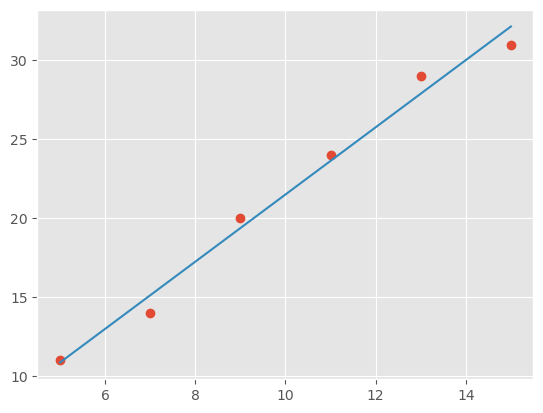

In [39]:
plt.plot(X, y, 'o')  # Scatter plot of original data
plt.plot(X, pred)  # Line plot of predictions
plt.show()

shows the line of best fit

In [40]:
model.score(X,y)

0.9864918906909576

aligns with r2 from above

## Simple linear regression with automobile data

we will use sklearn to predict automobile mileage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and testing set.

In [44]:
# Load the automobile dataset mtcars.csv from URL

dfcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
